In [1]:
# https://xcitech.github.io/tutorials/heroku_tutorial/
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
# Data source is '2015_CBQ_I.csv' from NHANES 'GrocerySpending' folder
# Columns originally named with question code (Example: CDB071)
# Columns renamed with descriptive question ID (Example: Grocery)
df = pd.read_csv('mldata_clean.csv', encoding='latin-1')

In [3]:
df = df[df.G_Emp != 'j']

In [4]:
df.columns

Index(['GeoID', 'Year', 'D_Etab', 'D_Emp', 'D_Pay', 'G_Etab', 'G_Emp',
       'G_Pay'],
      dtype='object')

In [5]:
df.dtypes

GeoID      int64
Year       int64
D_Etab     int64
D_Emp      int64
D_Pay      int64
G_Etab     int64
G_Emp     object
G_Pay     object
dtype: object

In [6]:
df.astype('int64').dtypes

GeoID     int64
Year      int64
D_Etab    int64
D_Emp     int64
D_Pay     int64
G_Etab    int64
G_Emp     int64
G_Pay     int64
dtype: object

In [7]:
# Drop empty values and convert data to integer
df = df.dropna(how='any')
df = df.iloc[:, 2:]
df

,D_Etab,D_Emp,D_Pay,G_Etab,G_Emp,G_Pay
0,23,195,2189,25,913,13355
1,98,940,12949,162,7238,116756
2,53,454,5614,38,2327,37914
3,12,80,1150,11,306,5385
4,28,217,2738,16,1031,19205
5,250,2519,38089,489,34304,661766
6,21,189,2029,20,579,8966
7,4,47,679,28,706,17740
8,10,69,996,51,1312,30462
9,5,36,606,35,1695,39994


In [8]:
# df.describe()

In [9]:
# df.corr()

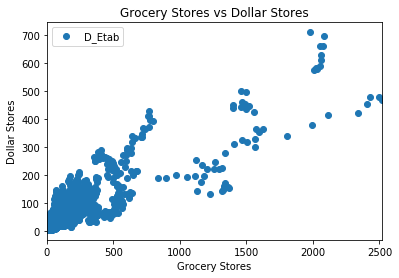

<Figure size 1440x720 with 0 Axes>

In [10]:
df.plot(x='G_Etab', y='D_Etab', style='o')  
plt.title('Grocery Stores vs Dollar Stores')  
plt.xlabel('Grocery Stores')  
plt.ylabel('Dollar Stores')

plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()

### Train model & Set Target


In [11]:
df.columns

Index(['D_Etab', 'D_Emp', 'D_Pay', 'G_Etab', 'G_Emp', 'G_Pay'], dtype='object')

In [12]:
from sklearn.datasets import make_regression

n_features = 5
n_samples = len(df)
X, y = make_regression(n_samples=n_samples, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape, y.shape)

(11607, 5) (11607,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [14]:
X_train

array([[ 1.16911804,  0.48103681,  1.11373751, -2.26554779,  0.12621847],
       [-0.0262962 ,  0.48105572, -0.43407382, -1.3844356 , -0.94353212],
       [ 1.51877501, -0.27473949,  1.5660521 , -0.18634386, -1.00255504],
       ...,
       [-1.18062605,  0.33952995,  0.9412564 , -1.04408594,  0.32800972],
       [-0.68211466,  0.81219644,  0.70361328,  0.31492847,  1.00175343],
       [ 0.73833686,  0.34081639,  1.81122139,  0.98691519,  0.34430983]])

In [15]:
# # scale data

from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Robust Scaler
# https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

# from sklearn.preprocessing import RobustScaler
# robust = RobustScaler(quantile_range = (0.1,0.9))
# robust.fit_transform(X_train.f3.values.reshape(-1, 1))

In [17]:
print(len(X_train_scaled))
print(len(X_test_scaled))

7776
3831


## Machine Learning

In [18]:
# Used example of Example 21.1.2 Stu_LSD
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9999588068855109
Testing Score: 0.9999598214402481


In [20]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

# 'D_Etab', 'D_Emp', 'D_Pay', 'G_Emp','G_Pay'


Weight coefficients:  [130.96522569 288.47782272 314.94847564 364.24405047 197.48194374]
y-axis intercept:  -560.3548747433236


In [21]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[-4.46560386]]
Max X Value: [[4.47908425]]


Text(0.5, 1.0, 'Residual Plot')

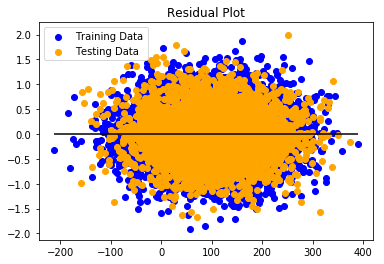

In [22]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")

plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [23]:
predictions=model.predict(X_test_scaled)
print(len(predictions))

3831


In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(len(df))
df.head(20)

3831


,Actual,Predicted
0,35.990246,36.111389
1,51.390077,51.338260
2,181.572043,181.546337
3,75.282145,75.382673
4,-56.855818,-56.886347
5,160.851066,159.897191
6,155.936762,155.698698
7,15.853990,15.731294
8,131.675309,131.939645
9,39.854040,39.940424


In [ ]:
Xnew, _ = make_regression(n_samples=n_samples, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)

In [ ]:
new_predictions = model.predict(Xnew)

In [ ]:
new_predictions

In [ ]:
y_test[:10] # compare with actual results

In [ ]:
# Weight coefficients:  [ 2980.68464421 -5743.40197829  3111.27834167 -2212.21755309
#   3899.81764967]
# y-axis intercept:  0.953384984611354

In [ ]:
b=0
D_Etab = 23
D_Emp = 195
D_Pay = 2189
G_Emp = 913|
G_Pay = 13355

In [ ]:
Weight coefficients:  [635.87040764 768.65680868   2.2814051  308.62120712  38.62228019]
y-axis intercept:  -735.290243925506

In [ ]:
# formula for grocery store:
G_Etab = -735*b + 634*D_Etab - 768*D_Emp + 2*D_Pay + 308*G_Emp + 38*G_Pay
G_Etab

In [ ]:
# formula for grocery store:
# G_Etab = -11.1*b + 4.21*D_Etab - 5.12*D_Emp + 1.47*D_Pay -2.81*G_Emp + 1.86*G_Pay
G_Etab

In [ ]:
# formula for grocery store:
G_Etab = 100*b + 64*D_Etab - 8.4*D_Emp + 89*D_Pay + 16*G_Emp + 78*G_Pay
G_Etab